## Step 1 : Import Required Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 : Load the dataset

In [27]:
df = pd.read_csv("Mall_Customers (3).csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
df.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [31]:
df.drop("CustomerID",axis = 1,inplace = True)

## Step 4 : EDA

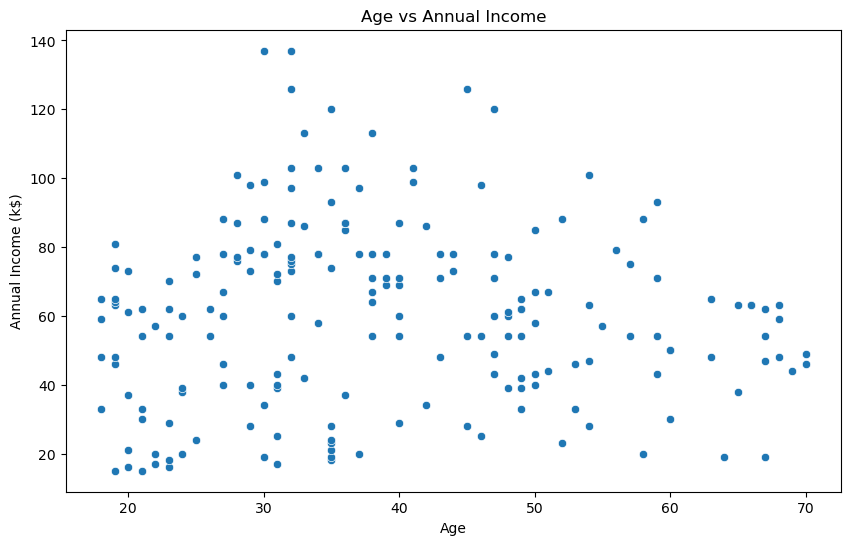

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "Age", y="Annual Income (k$)", data = df)
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

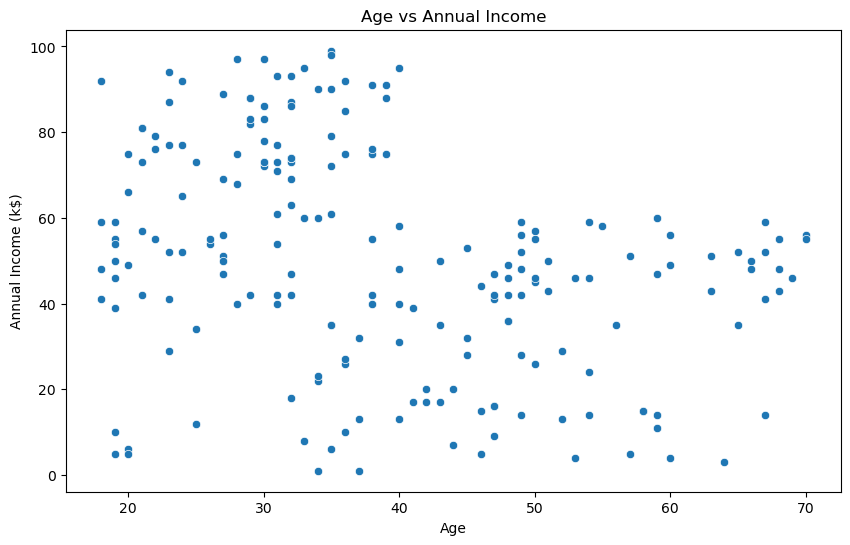

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "Age", y="Spending Score (1-100)", data = df)
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

## Step 5 : Feature Engineering

In [17]:
def skewness_name(skewness) :
    if skewness > 0 :
        return "Right Skewed"
    elif skewness < 0 :
        return "Left Skewed"
    else :
        return "Normal"
print("Age skewness : ", skewness_name(df["Age"].skew()))
print("Age skewness : ", skewness_name(df["Annual Income (k$)"].skew()))
print("Age skewness : ", skewness_name(df["Spending Score (1-100)"].skew()))

Age skewness :  Right Skewed
Age skewness :  Right Skewed
Age skewness :  Left Skewed


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data,columns = df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Step 6 : Train K-Mean model

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state = 42)
kmeans.fit(df)
df["Cluster"] = kmeans.labels_
df.head()

c:\Users\PanasaKamal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


c:\Users\PanasaKamal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PanasaKamal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PanasaKamal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PanasaKamal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have

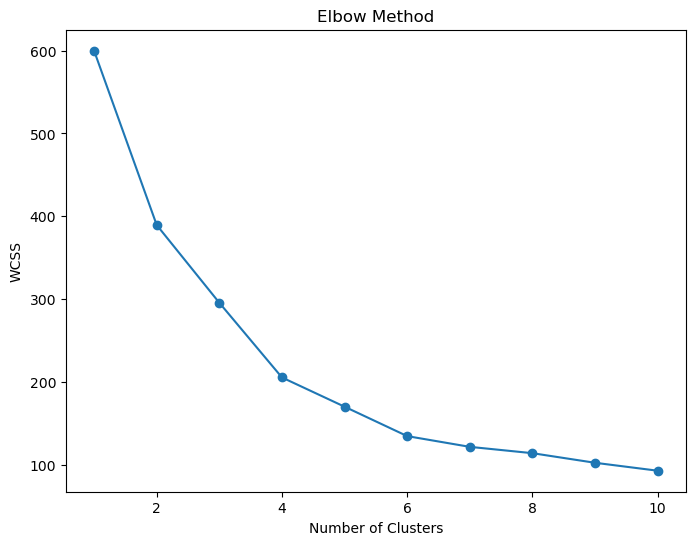

In [20]:
wcss = []
for i in range(1,11) : 
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(df.drop("Cluster",axis=1))
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (8,6))
plt.plot(range(1,11),wcss,marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

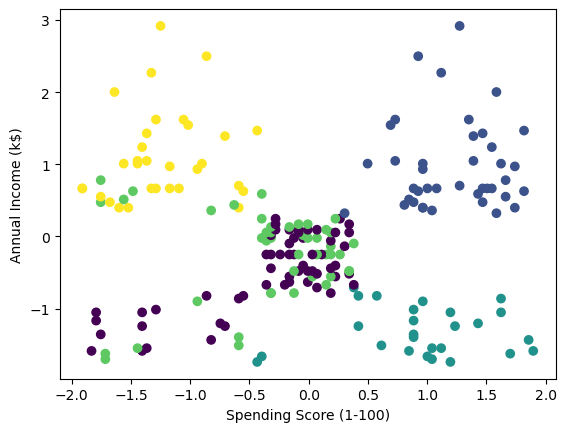

In [21]:
plt.scatter(df["Spending Score (1-100)"],
            df["Annual Income (k$)"],
            c=df["Cluster"]
            )
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')


In [ ]:
# saved the file
df.to_csv("clustered_mall_customers.csv",index = False)

In [34]:
x = df.drop("Cluster",axis=1)
y = df["Cluster"]

In [39]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

models = {
    "Random Forest" : RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier()
}

for name,model in models.items() :
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"Model : {name}")
    print(accuracy_score(y_test,y_pred)*100)
    print(model.score(x_test,y_test))




Model : Random Forest
100.0
1.0
Model : Decision Tree
95.0
0.95
Model : KNN
97.5
0.975
